In [1]:
%load_ext autoreload
%autoreload 1
%matplotlib inline


In [2]:
import numpy as np
import pandas as pd
import matplotlib, collections, itertools, os, re, textwrap, logging
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from functools import reduce

from logging.config import dictConfig
from logging import getLogger

dictConfig(dict(
    version = 1,
    formatters = {'f': {'format': '%(asctime)s %(name)-12s %(levelname)-8s %(message)s'}},
    handlers = {
        'h': {'class': 'logging.StreamHandler','formatter': 'f',
              'level': logging.DEBUG}},
    root = {'handlers': ['h'], 'level': logging.DEBUG,},
))

matplotlib.rc('font',**{'size':16, 'family':'sans-serif','sans-serif':['HelveticaNeue', 'Helvetica']})

logger = getLogger('notebook')


In [3]:
font = {
#     'family' : 'normal',
#     'weight' : 'bold',
    'size'   : 32
}
matplotlib.rc('font', **font)


In [4]:
import yt_misc_py as yt_misc

import rivas_decomposition_py as decomposition


In [5]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

In [6]:
repo_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath(os.getcwd()))))

out_dir = os.path.join(
    repo_dir, 'figs', os.path.basename(os.path.realpath(os.getcwd())),
)


In [7]:
d_all_100PCs = decomposition.decomposition(os.path.join(
    repo_dir, 'private_data', 'npz', 'dev_allNonMHC_z_center_p0001_100PCs_20180129.npz'
))


2019-01-25 15:23:06,438 data_load_from_npz INFO     reading data from /Users/yosuke/repos/rivas-lab/decomposition/private_data/npz/dev_allNonMHC_z_center_p0001_100PCs_20180129.npz


In [8]:
d_all_90PCs = decomposition.decomposition(os.path.join(
    repo_dir, 'private_data', 'npz', 'dev_allNonMHC_z_center_p0001_tsvd_90PCs_20181209.npz'
))


2019-01-25 15:23:19,351 data_load_from_npz INFO     reading data from /Users/yosuke/repos/rivas-lab/decomposition/private_data/npz/dev_allNonMHC_z_center_p0001_tsvd_90PCs_20181209.npz


In [9]:
d_all_110PCs = decomposition.decomposition(os.path.join(
    repo_dir, 'private_data', 'npz', 'dev_allNonMHC_z_center_p0001_tsvd_110PCs_20181210.npz'
))


2019-01-25 15:23:29,522 data_load_from_npz INFO     reading data from /Users/yosuke/repos/rivas-lab/decomposition/private_data/npz/dev_allNonMHC_z_center_p0001_tsvd_110PCs_20181210.npz


## Phenotype PCA plot

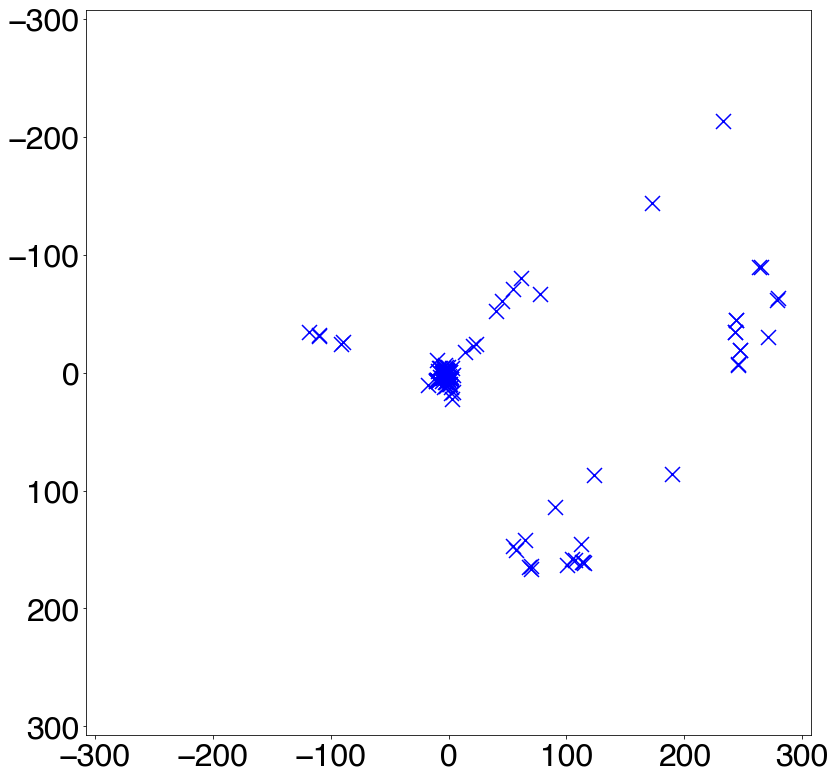

In [10]:
decomposition.plot_pca_phe(
    d_all_90PCs, pc_index1 = 0, pc_index2 = 1, 
    figsize=(12,12), 
    flip_yaxis=True,
    save=os.path.join(out_dir, 'fig-pca-phe-dev_allNonMHC_z_center_p0001_tsvd_90PCs_20181209'),
    save_exts=['pdf', 'png'],    
)

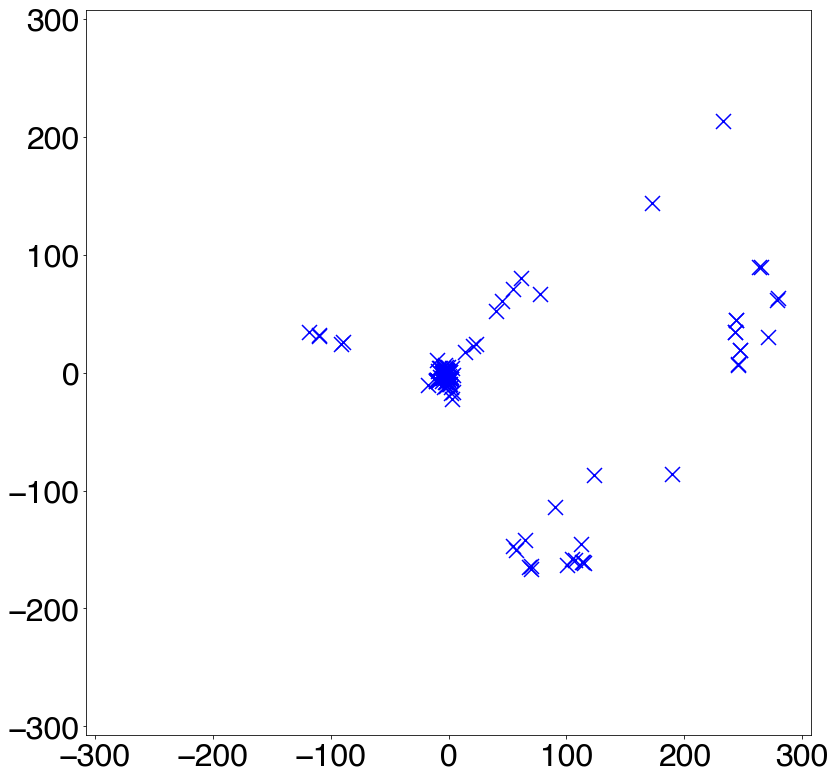

In [11]:
decomposition.plot_pca_phe(
    d_all_110PCs, pc_index1 = 0, pc_index2 = 1, 
    figsize=(12,12), 
    save=os.path.join(out_dir, 'fig-pca-phe-dev_allNonMHC_z_center_p0001_tsvd_110PCs_20181210'),
    save_exts=['pdf', 'png'],    
)

## Variant PCA plot with biplot annotation

In [11]:
biplot_phes = [
    'Body mass index (BMI)',
    'heart attack/myocardial infarction',
    'cholelithiasis/gall stones',
    'Whole body fat-free mass',
    'Whole body fat mass',
    'Standing height',
    'Sitting height',
    'Weight',
]


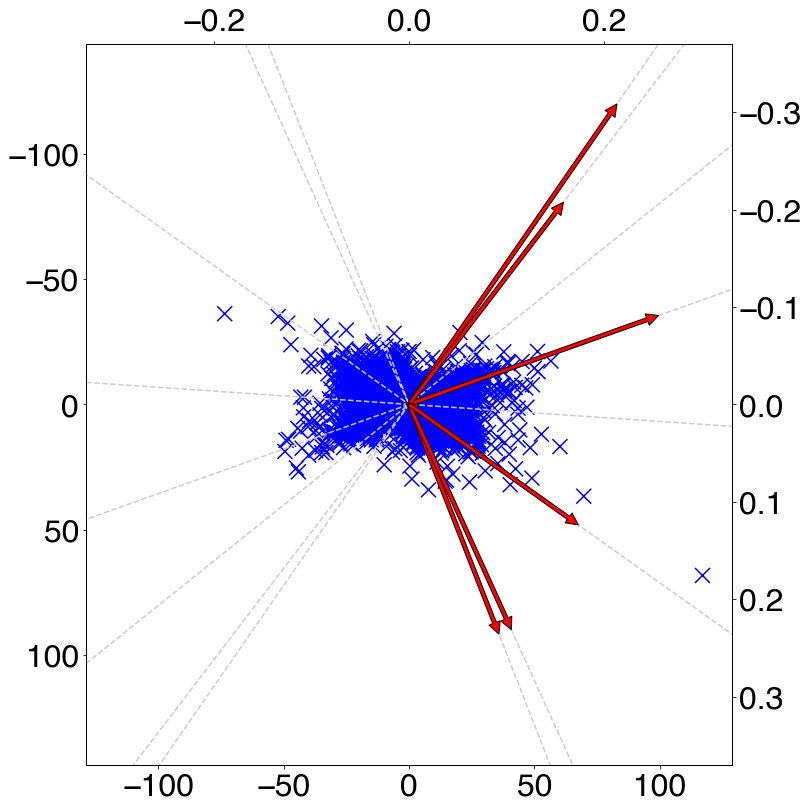

In [12]:
biplot_df = decomposition.plot_biplot(
    d_all_90PCs, 
    pc_index1=0, pc_index2=1, 
    biplot_phes=biplot_phes, 
    arrow_max_scale=1.2,    
    figsize=(12,12), 
    flip_yaxis=True,    
    save=os.path.join(out_dir, 'fig-pca-biplot-dev_allNonMHC_z_center_p0001_tsvd_90PCs_20181209')
)

In [14]:
biplot_df = pd.read_table(os.path.join(
    out_dir, 
    'fig-pca-biplot-dev_allNonMHC_z_center_p0001_tsvd_90PCs_20181209.tsv'
))

In [15]:
biplot_df['slope'] = biplot_df['y'] / biplot_df['x']

In [16]:
biplot_df.sort_values(by='slope')

,phe,x,y,r,slope
0,Standing height,0.213486,-0.308435,0.375111,-1.444755
1,Sitting height,0.158644,-0.207558,0.261244,-1.308326
2,cholelithiasis/gall stones,-0.001464,0.001175,0.001878,-0.802477
3,Whole body fat-free mass,0.256289,-0.091222,0.272039,-0.355933
4,heart attack/myocardial infarction,-0.003243,-0.000221,0.003251,0.068087
5,Weight,0.173943,0.123763,0.213479,0.711515
6,Whole body fat mass,0.105019,0.231263,0.253991,2.202106
7,Body mass index (BMI),0.092339,0.235935,0.253361,2.555101


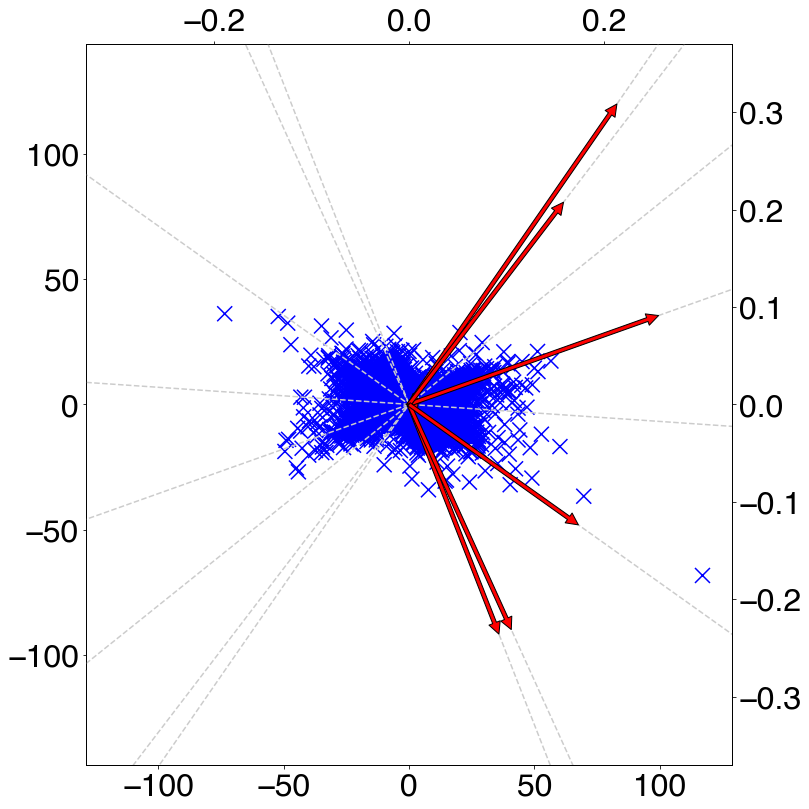

In [17]:
biplot_df = decomposition.plot_biplot(
    d_all_110PCs, 
    pc_index1=0, pc_index2=1, 
    biplot_phes=biplot_phes, 
    arrow_max_scale=1.2,    
    figsize=(12,12), 
    save=os.path.join(out_dir, 'fig-pca-biplot-dev_allNonMHC_z_center_p0001_tsvd_110PCs_20181210')
)

In [18]:
biplot_df = pd.read_table(os.path.join(
    out_dir, 
    'fig-pca-biplot-dev_allNonMHC_z_center_p0001_tsvd_110PCs_20181210.tsv'
))

In [19]:
biplot_df['slope'] = biplot_df['y'] / biplot_df['x']

In [20]:
biplot_df.sort_values(by='slope')

,phe,x,y,r,slope
0,Body mass index (BMI),0.092339,-0.235935,0.253361,-2.555101
1,Whole body fat mass,0.105019,-0.231263,0.253991,-2.202106
2,Weight,0.173943,-0.123763,0.213479,-0.711515
3,heart attack/myocardial infarction,-0.003243,0.000221,0.003251,-0.068087
4,Whole body fat-free mass,0.256289,0.091222,0.272039,0.355933
5,cholelithiasis/gall stones,-0.001464,-0.001175,0.001878,0.802477
6,Sitting height,0.158644,0.207558,0.261244,1.308326
7,Standing height,0.213486,0.308435,0.375111,1.444755


## First 5 PCs

In [21]:
var_gene_labels_df = pd.read_table(
    os.path.join(repo_dir, 'private_data', 'variant_and_gene_labels.tsv.gz'),
    compression='gzip'
)

gene_dict = dict(zip(
    var_gene_labels_df['Gene'], 
    var_gene_labels_df['label_gene']
))


In [26]:
def plot_fitst5_PCs(dataset, dataset_name, gene_dict):
    phe_gs = decomposition.Phe_label_groups(dataset.d['label_phe'])
    phe_gs.add('fat-free')
    phe_gs.add('fat', 'fat\s')
    phe_gs.add('impedance')
    phe_gs.add('reticulocyte')
    phe_gs.add('meridian')
    phe_gs.add('spirometry', r'fvc|fev1|pef')

    print(phe_gs)
    
    for k, v in phe_gs.dict.items():
        decomposition.plot_contribution_legend_phe(
            d = dataset, pc_index = 0, 
            phe_list=v,        
            save = os.path.join(out_dir, dataset_name, 'legend', 'group_{}'.format(k)),
        )
        
    decomposition.plot_contribution_legend_batch_topk_fig(
        gene_dict = gene_dict, 
        out_dir = os.path.join(out_dir, dataset_name, 'legend'), 
        fig_title = 'Top5', 
        d = dataset, 
        topk = 5,
        phe_gs=phe_gs,
    )

    decomposition.contribution_score_plot(
        dataset, 'phe', pc_list=range(5), bar_width=0.15,
        figsize=(16, 4),
        contribution_thr=0.005,
        save=os.path.join(out_dir, dataset_name, 'fig-phe-top5-groups-{}'.format(dataset_name)),
        phe_gs=phe_gs
    )

    decomposition.contribution_score_plot(
        dataset, 'gene', pc_list=range(5), bar_width=0.15,
        figsize=(16, 4),
        contribution_thr=0.0005,
        save=os.path.join(out_dir, dataset_name, 'fig-gene-top5-{}'.format(dataset_name))
    )

    

In [31]:
font = {
    'family':'sans-serif',
    'sans-serif':['HelveticaNeue', 'Helvetica'],
    'size'   : 16
}
matplotlib.rc('font', **font)


fat-free
  Arm fat-free mass (left)
  Arm fat-free mass (right)
  Leg fat-free mass (left)
  Leg fat-free mass (right)
  Total fat-free mass
  Trunk fat-free mass
  Whole body fat-free mass

fat
  Android fat mass
  Android tissue fat percentage
  Arm fat mass (left)
  Arm fat mass (right)
  Arm fat percentage (left)
  Arm fat percentage (right)
  Arm tissue fat percentage (left)
  Arm tissue fat percentage (right)
  Arms fat mass
  Arms tissue fat percentage
  Body fat percentage
  Gynoid fat mass
  Gynoid tissue fat percentage
  Leg fat mass (left)
  Leg fat mass (right)
  Leg fat percentage (left)
  Leg fat percentage (right)
  Leg tissue fat percentage (left)
  Leg tissue fat percentage (right)
  Legs fat mass
  Legs tissue fat percentage
  Total fat mass
  Total tissue fat percentage
  Trunk fat mass
  Trunk fat percentage
  Trunk tissue fat percentage
  Whole body fat mass

impedance
  Impedance of arm (left)
  Impedance of arm (right)
  Impedance of leg (left)
  Impedance of leg

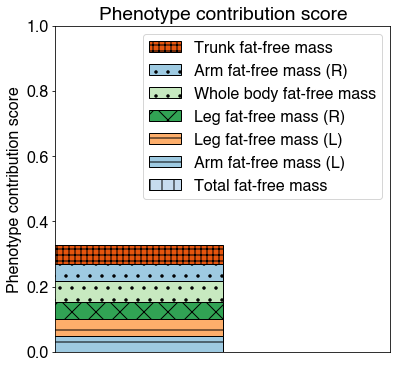

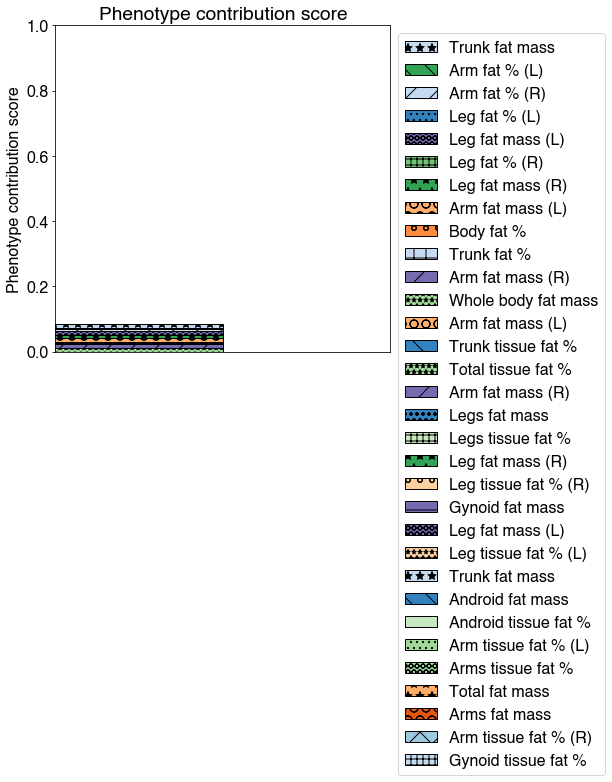

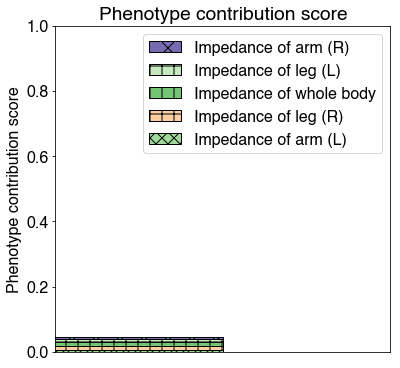

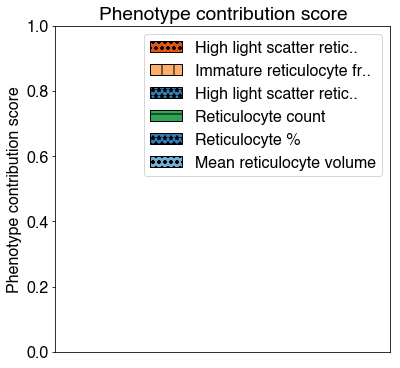

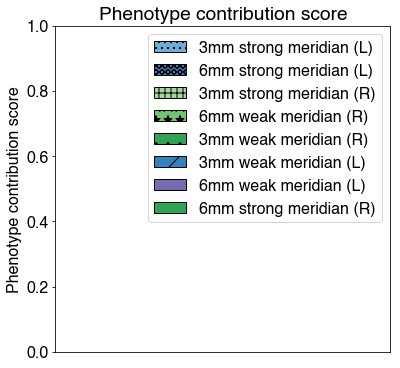

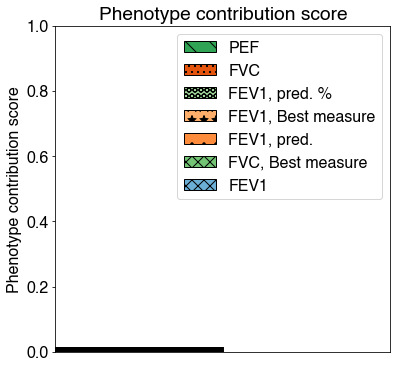

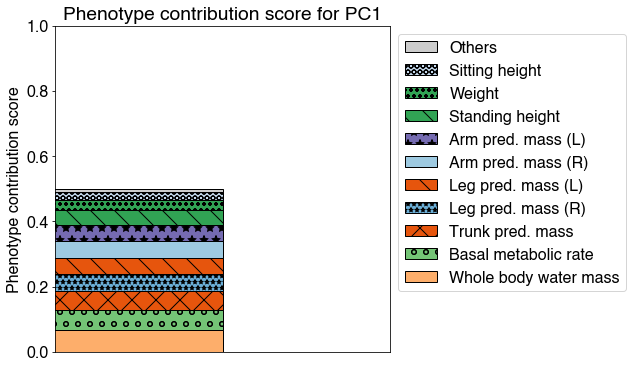

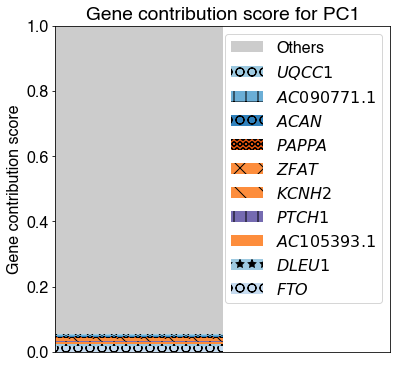

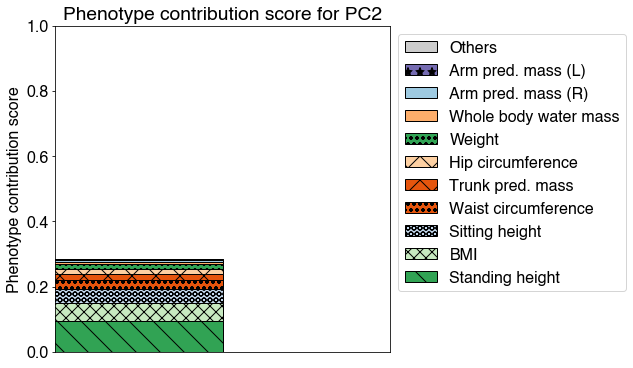

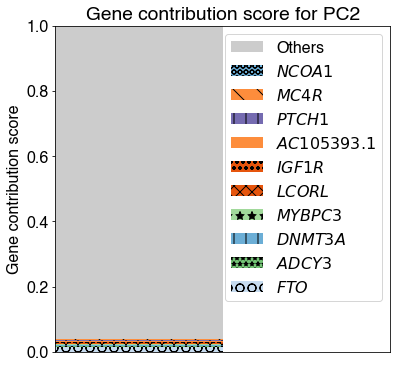

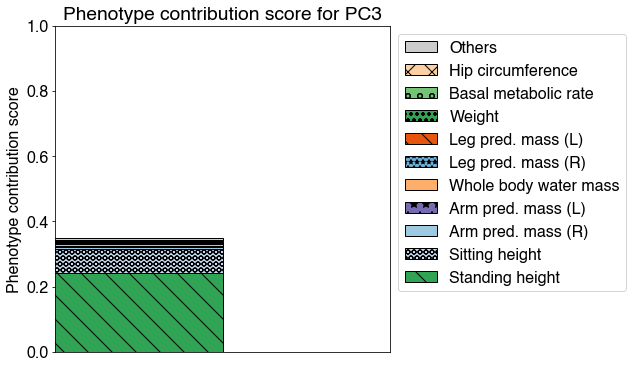

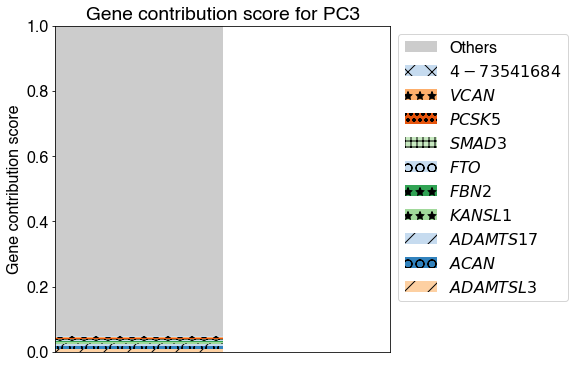

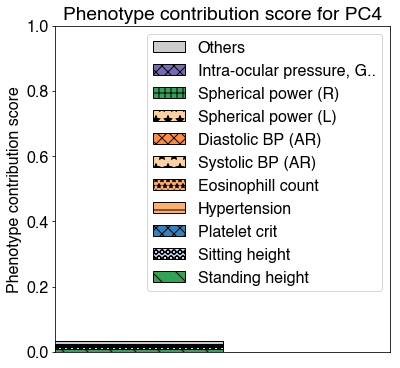

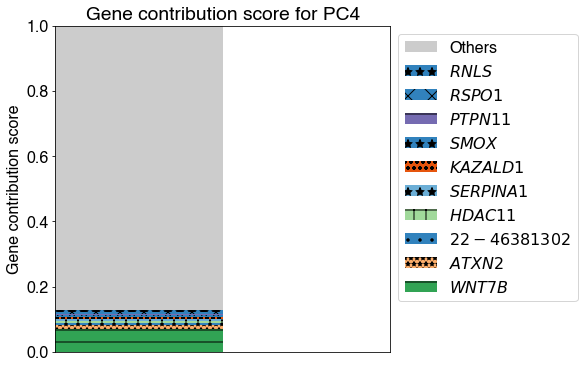

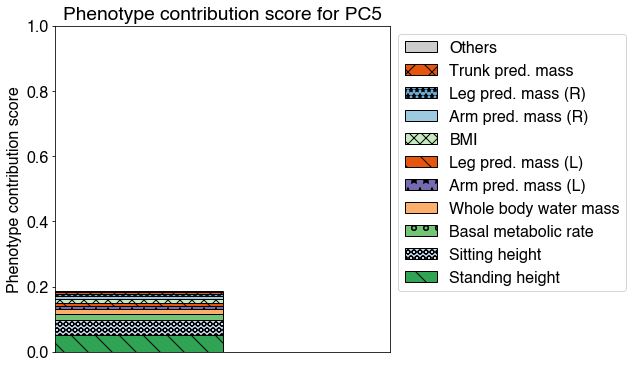

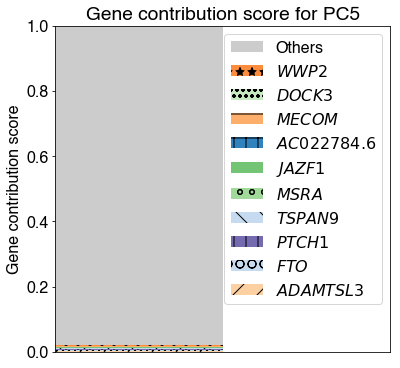

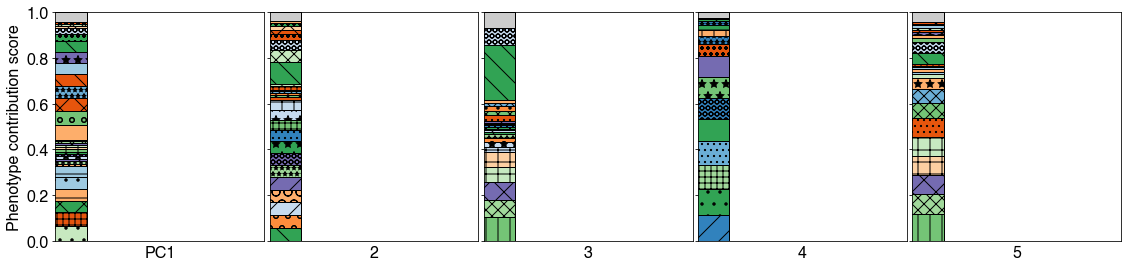

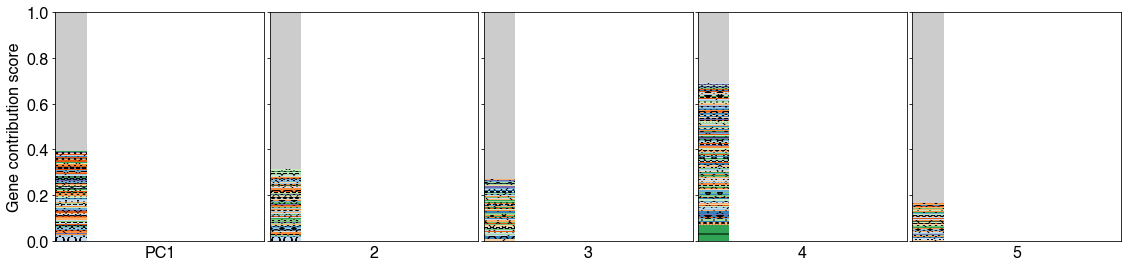

In [32]:
plot_fitst5_PCs(d_all_90PCs, 'dev_allNonMHC_z_center_p0001_tsvd_90PCs_20181209', gene_dict)

fat-free
  Arm fat-free mass (left)
  Arm fat-free mass (right)
  Leg fat-free mass (left)
  Leg fat-free mass (right)
  Total fat-free mass
  Trunk fat-free mass
  Whole body fat-free mass

fat
  Android fat mass
  Android tissue fat percentage
  Arm fat mass (left)
  Arm fat mass (right)
  Arm fat percentage (left)
  Arm fat percentage (right)
  Arm tissue fat percentage (left)
  Arm tissue fat percentage (right)
  Arms fat mass
  Arms tissue fat percentage
  Body fat percentage
  Gynoid fat mass
  Gynoid tissue fat percentage
  Leg fat mass (left)
  Leg fat mass (right)
  Leg fat percentage (left)
  Leg fat percentage (right)
  Leg tissue fat percentage (left)
  Leg tissue fat percentage (right)
  Legs fat mass
  Legs tissue fat percentage
  Total fat mass
  Total tissue fat percentage
  Trunk fat mass
  Trunk fat percentage
  Trunk tissue fat percentage
  Whole body fat mass

impedance
  Impedance of arm (left)
  Impedance of arm (right)
  Impedance of leg (left)
  Impedance of leg

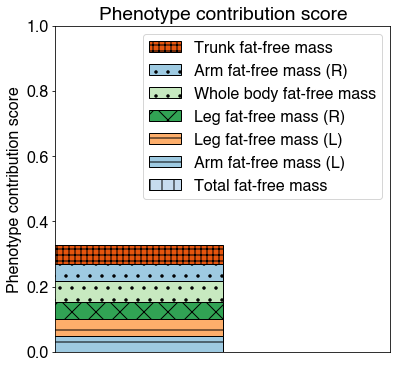

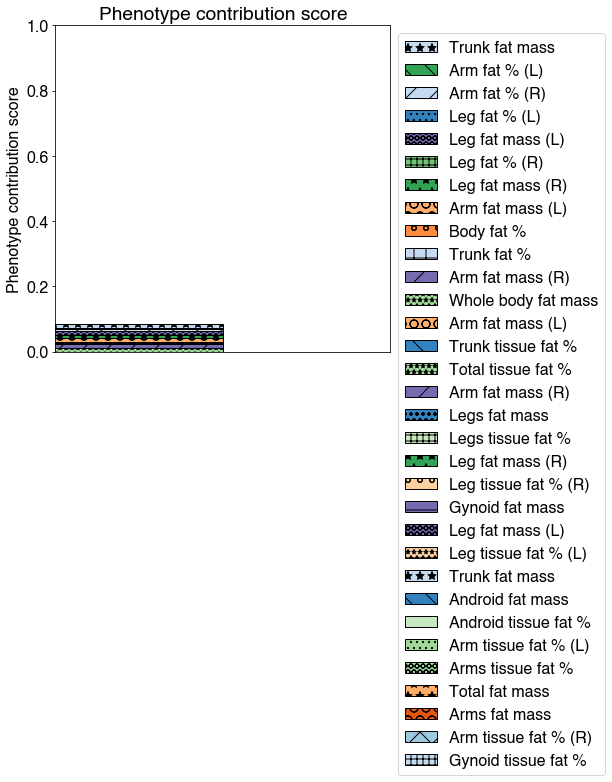

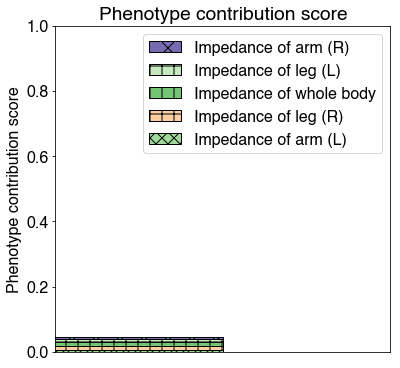

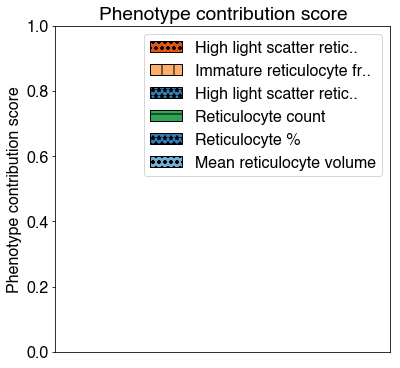

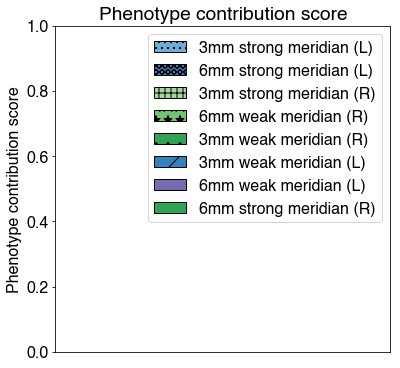

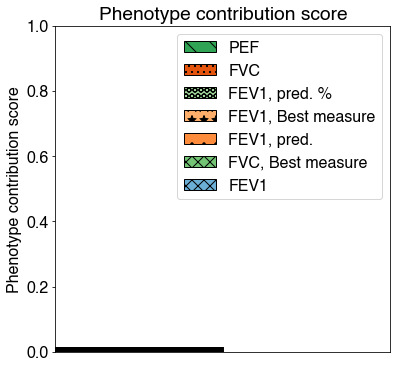

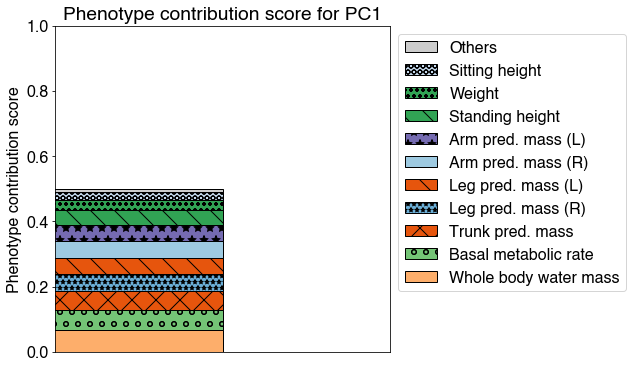

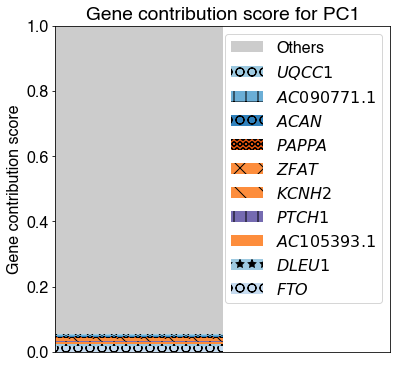

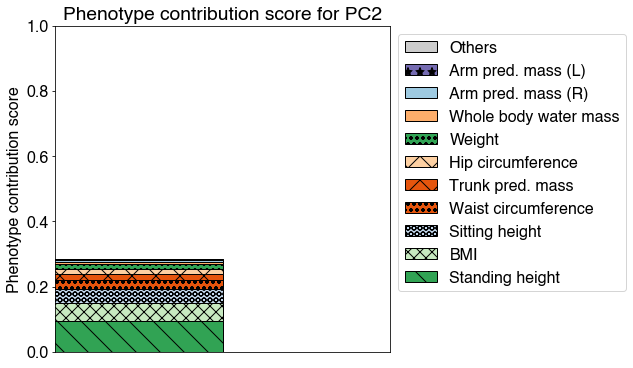

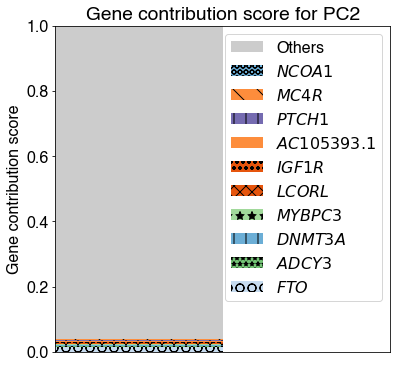

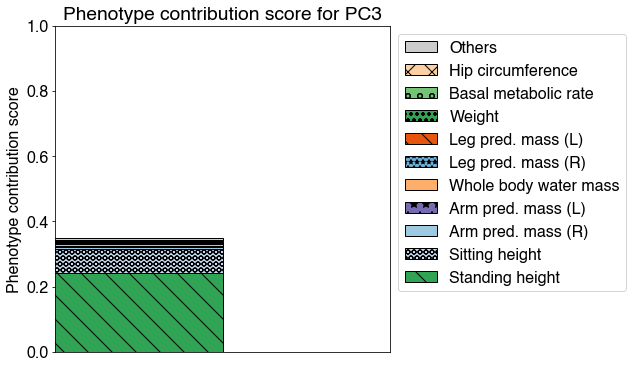

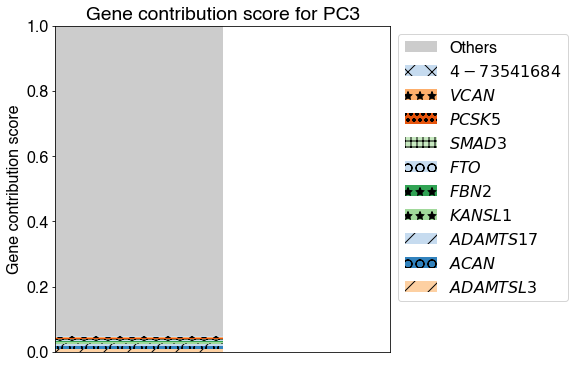

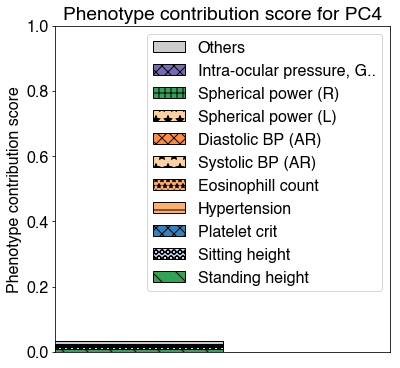

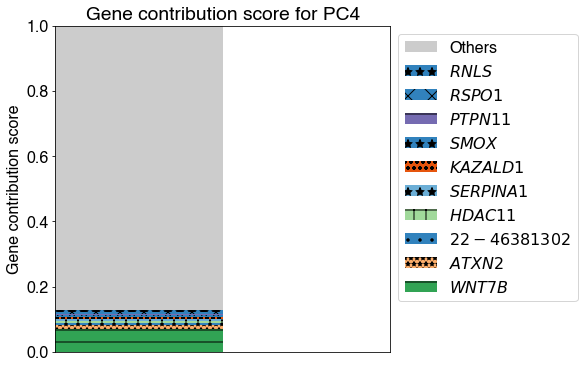

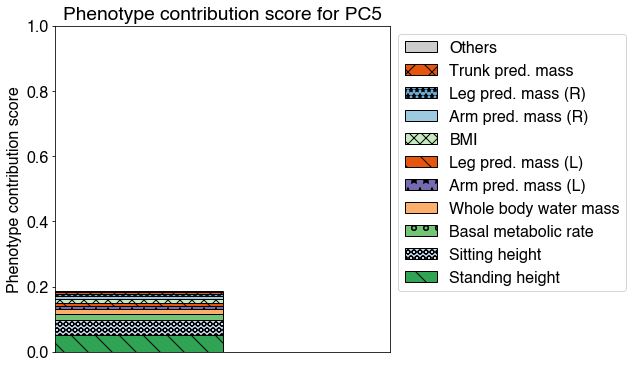

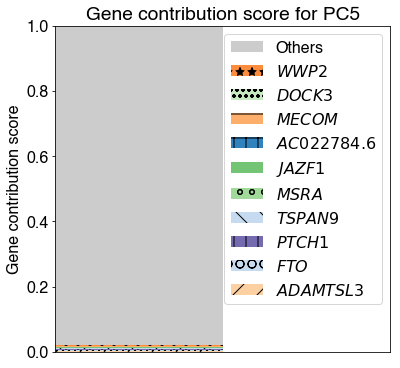

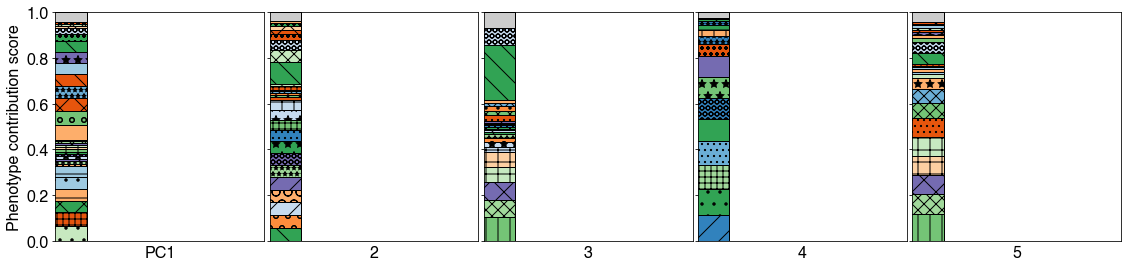

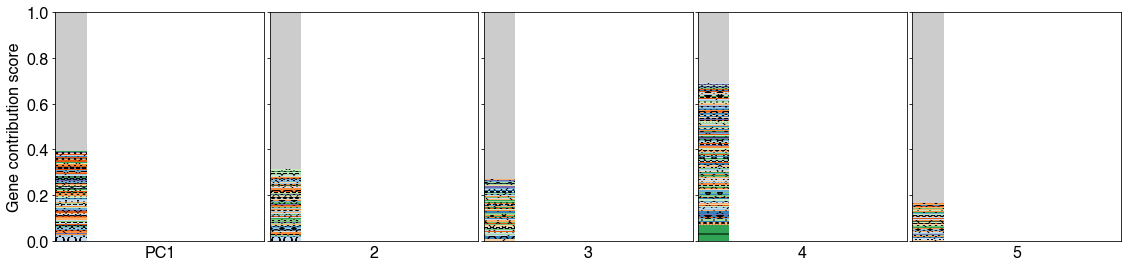

In [33]:
plot_fitst5_PCs(d_all_110PCs, 'dev_allNonMHC_z_center_p0001_tsvd_110PCs_20181210', gene_dict)

## Top 3 components for each phenotype

In [43]:
def plot_top3_components_for_each_phenotype(dataset, dataset_name):
    labels_dict_BMI = {
        'Body mass index (BMI)': 'BMI'
    }
    labels_dict_MI = {
        'heart attack/myocardial infarction': 'MI', 
    }
    labels_dict_gallstones = {
        'cholelithiasis/gall stones': 'Gallstones',     
    }    
    
    labels_dicts = {
        'BMI': labels_dict_BMI,
        'MI': labels_dict_MI,
        'Gallstones': labels_dict_gallstones,
    }
    
    phe_gs = decomposition.Phe_label_groups(dataset.d['label_phe'])
    phe_gs.add('fat-free')
    phe_gs.add('fat', 'fat\s')
    phe_gs.add('impedance')
    phe_gs.add('reticulocyte')
    phe_gs.add('meridian')
    phe_gs.add('spirometry', r'fvc|fev1|pef')

    for disease_name, disease_label in labels_dicts.items():
        disease_outdir = os.path.join(
            out_dir, dataset_name, 'top3_components_for_each_phenotype', disease_name
        )
        if(disease_name == 'BMI'):
            phe_gs_current = phe_gs
        else:
            phe_gs_current = None
        decomposition.plot_contribution_legend_phe_batch_fig(
            phe_labels_dict = disease_label, 
            out_dir = disease_outdir,
            fig_title = 'Top3_components', 
            d = dataset, 
            topk = 3, 
            phe_gs=phe_gs_current,
            topk_in_pc=8,
        )
        
        decomposition.plot_contribution_and_save(
            d = dataset,
            phe_or_gene = 'phe', 
            labels = disease_label.keys(), 
            topk = 3, 
            out_dir = disease_outdir,
            fig_title = 'Top3_components_{}'.format(disease_name), 
            fig_spacing = 7, 
            contribution_thr=0.005, 
            pc_y_max = 1, 
            figsize=(21,4),
            phe_gs=phe_gs_current
        )
        

2019-01-17 09:58:33,084 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/FigSX_robustness_num_PCs/dev_allNonMHC_z_center_p0001_tsvd_90PCs_20181209/top3_components_for_each_phenotype/BMI/Top3_components_BMI.pdf
2019-01-17 09:58:34,034 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/FigSX_robustness_num_PCs/dev_allNonMHC_z_center_p0001_tsvd_90PCs_20181209/top3_components_for_each_phenotype/BMI/Top3_components_BMI.png
2019-01-17 09:58:37,154 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/FigSX_robustness_num_PCs/dev_allNonMHC_z_center_p0001_tsvd_90PCs_20181209/top3_components_for_each_phenotype/MI/Top3_components_MI.pdf
2019-01-17 09:58:38,299 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/FigSX_robustness_num_PCs/dev_allNonMHC_z_center_p0001_tsvd_90PCs_20181209/top3_components_for_each_phenotype/MI/Top3_components_MI.png
2019-01-17 09:58:41,708 root         INFO     /Users/yosuke/repos/rivas-lab/

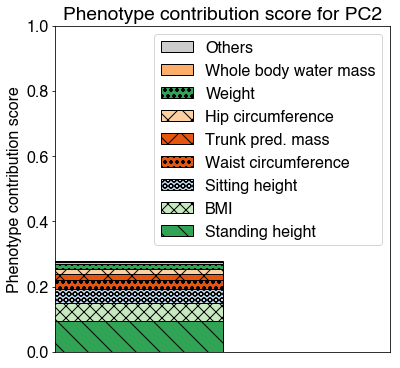

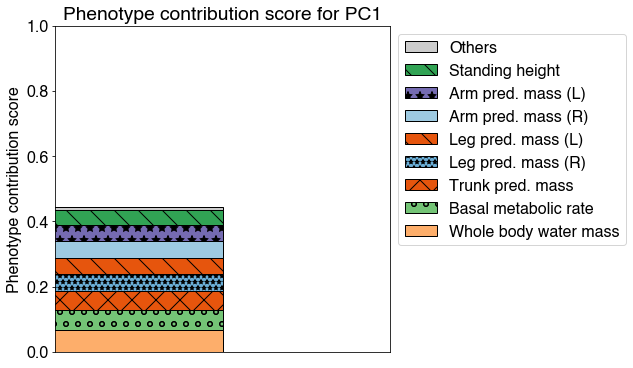

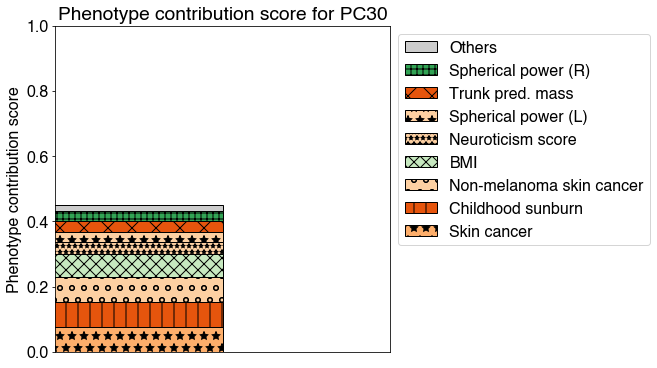

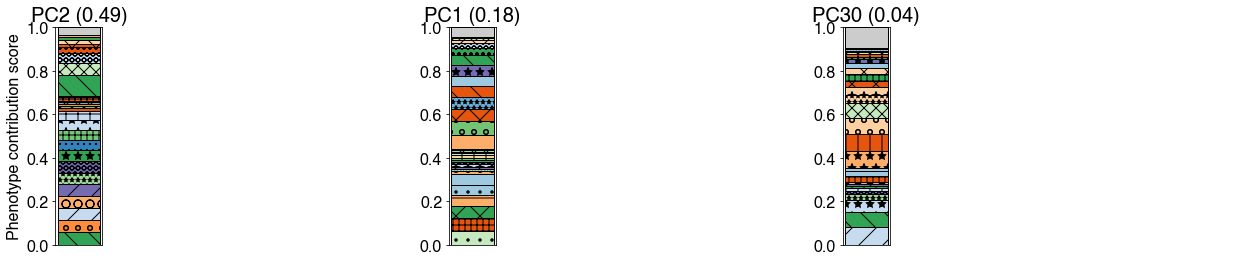

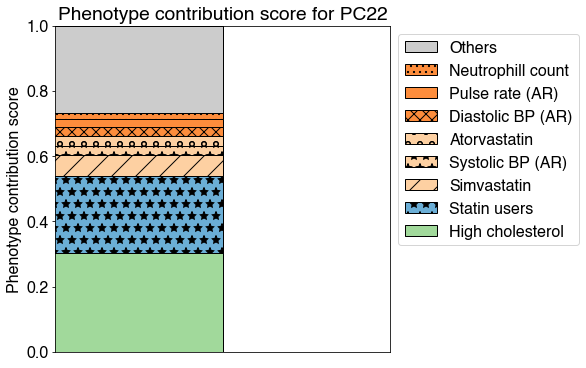

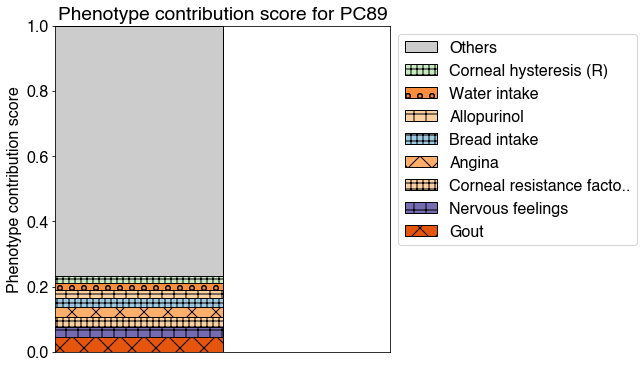

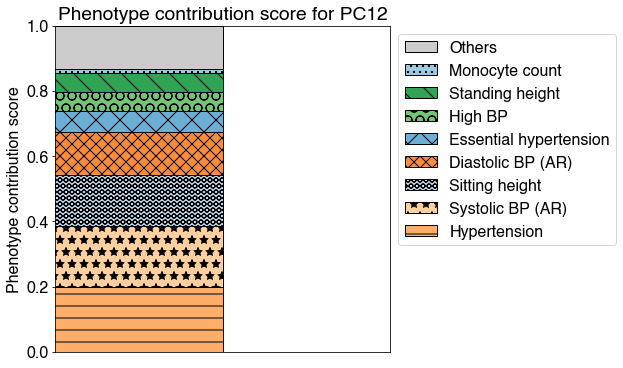

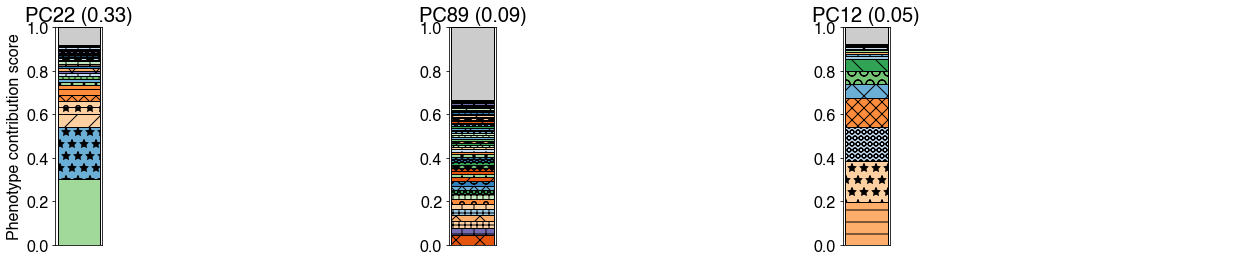

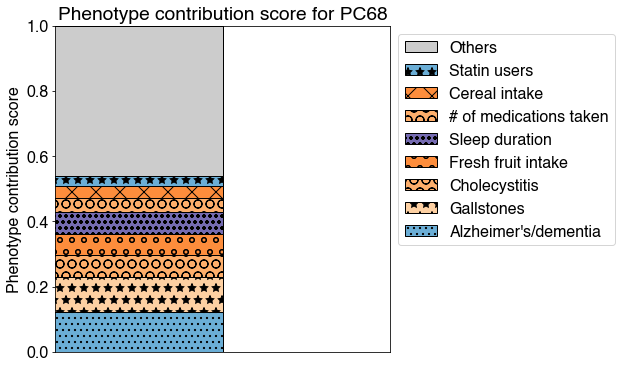

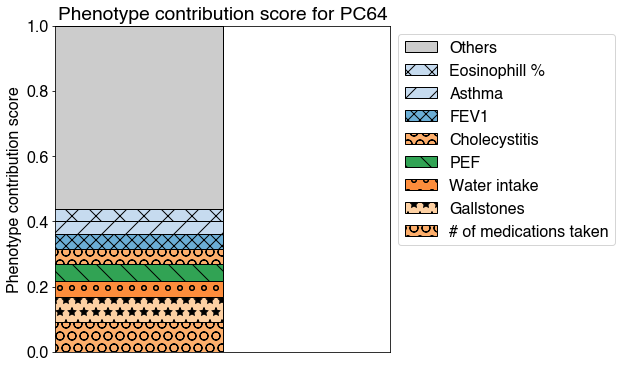

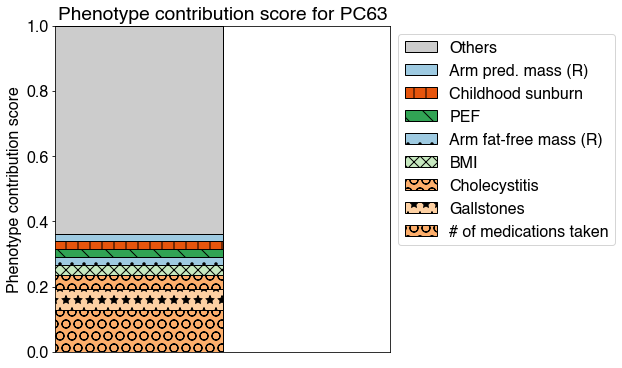

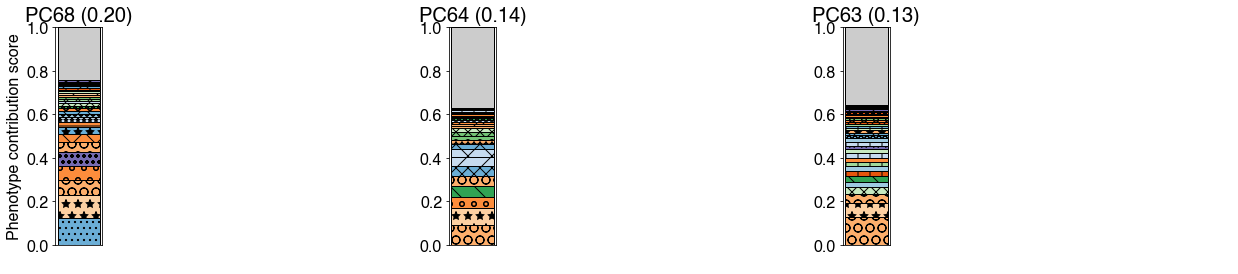

In [44]:
plot_top3_components_for_each_phenotype(d_all_90PCs, 'dev_allNonMHC_z_center_p0001_tsvd_90PCs_20181209')

2019-01-17 09:58:56,134 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/FigSX_robustness_num_PCs/dev_allNonMHC_z_center_p0001_tsvd_110PCs_20181210/top3_components_for_each_phenotype/BMI/Top3_components_BMI.pdf
2019-01-17 09:58:57,034 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/FigSX_robustness_num_PCs/dev_allNonMHC_z_center_p0001_tsvd_110PCs_20181210/top3_components_for_each_phenotype/BMI/Top3_components_BMI.png
2019-01-17 09:59:00,543 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/FigSX_robustness_num_PCs/dev_allNonMHC_z_center_p0001_tsvd_110PCs_20181210/top3_components_for_each_phenotype/MI/Top3_components_MI.pdf
2019-01-17 09:59:01,574 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/FigSX_robustness_num_PCs/dev_allNonMHC_z_center_p0001_tsvd_110PCs_20181210/top3_components_for_each_phenotype/MI/Top3_components_MI.png
2019-01-17 09:59:05,191 root         INFO     /Users/yosuke/repos/rivas-

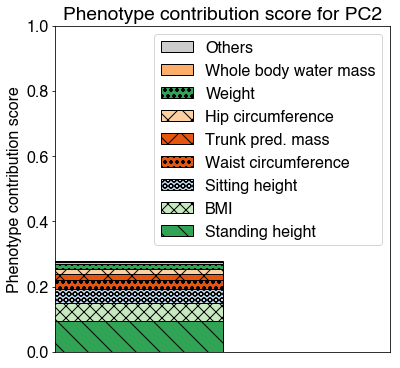

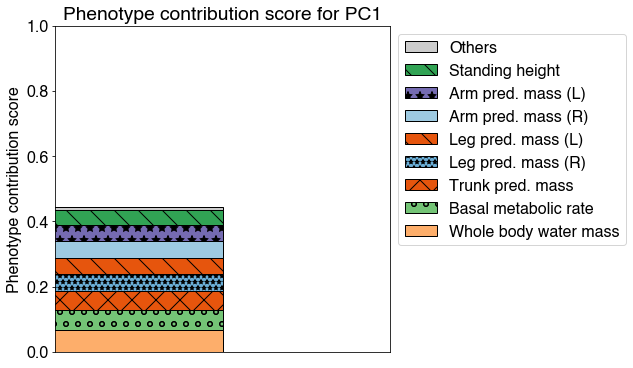

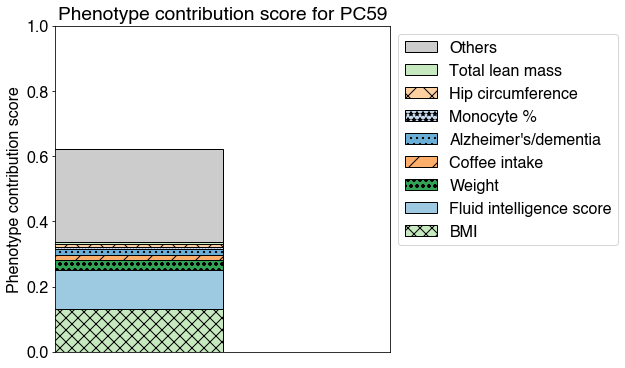

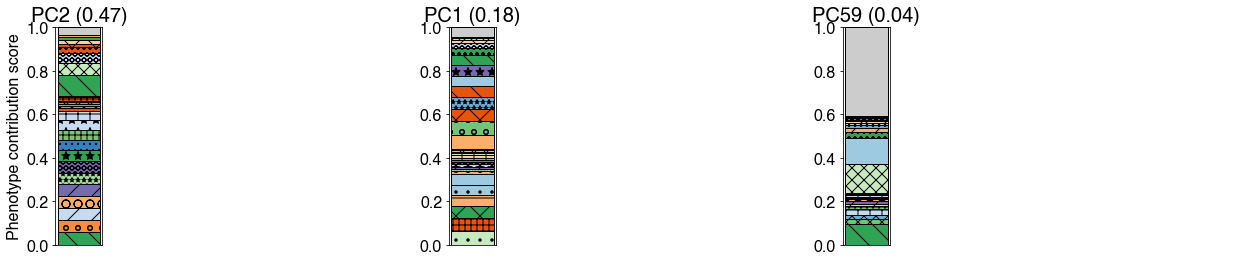

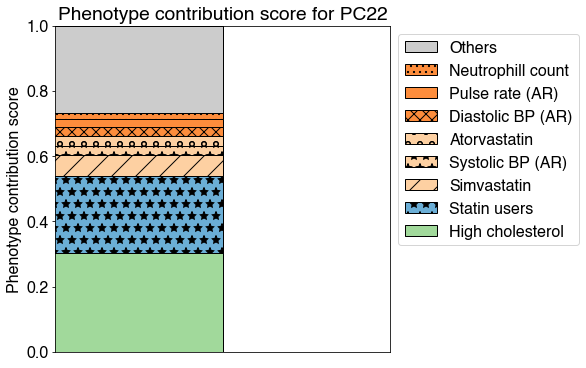

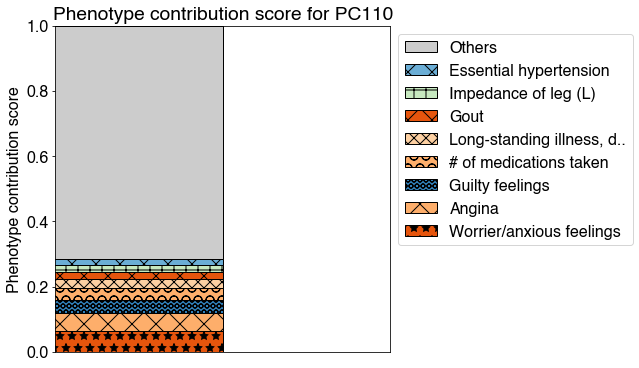

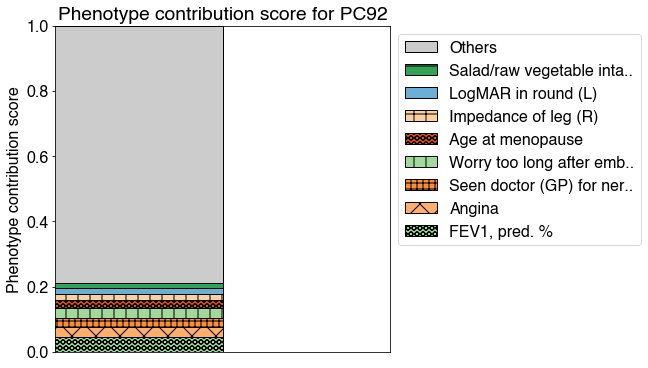

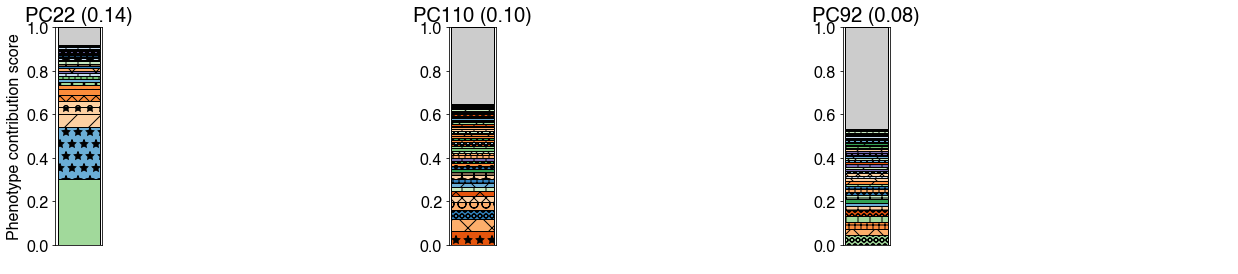

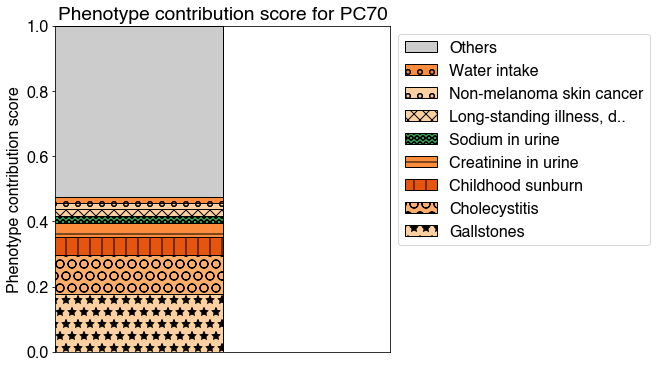

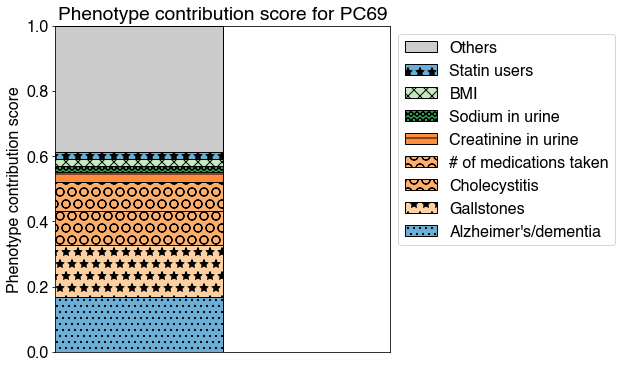

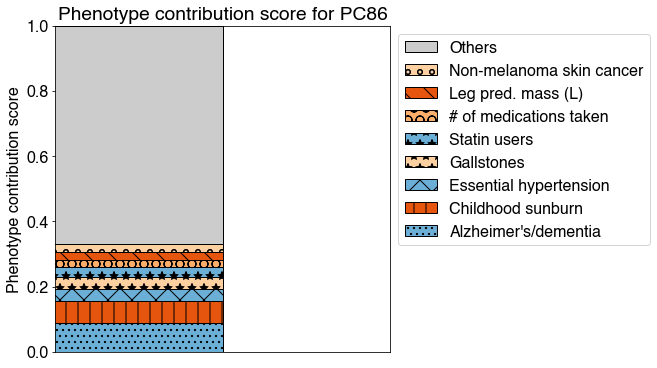

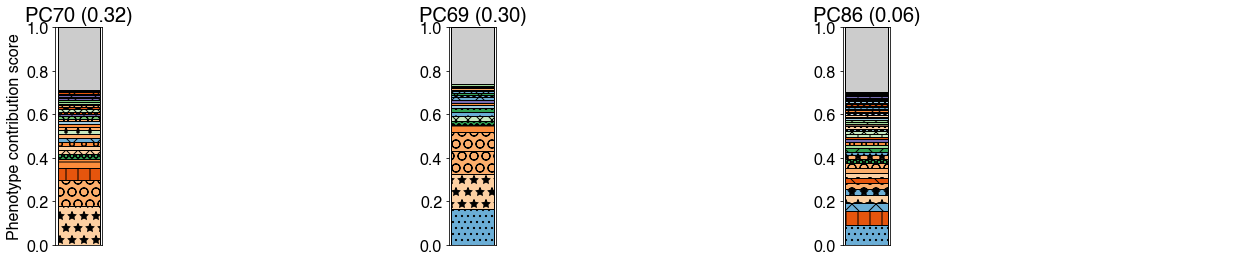

In [45]:
plot_top3_components_for_each_phenotype(d_all_110PCs, 'dev_allNonMHC_z_center_p0001_tsvd_110PCs_20181210')